In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re


sys.path.insert(0, 'C:/Users/ragna/Documents/Ragnar/Code/MMDGraph')
#from importlib import reload
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
#reload(readfoldertopanda)
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC


In [22]:
keys = ['sizes_1', 'sizes_2',  'n', 'm','mean22', 'mean23']
params_kernel = {}
data_auc = {}
data = {}

# Propagation


In [23]:
data['PROP'] = readfoldertopanda("../data/SBMAttributeNormal/PROP")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
data['PROP'].columns
data['PROP'] = data['PROP'].loc[data['PROP']['mean23'] == 2]

In [7]:
print(np.unique(data['PROP']['n']))
print(np.unique(data['PROP']['nr_nodes_2']))
print(np.unique(data['PROP']['m3_diff']))
print(np.unique(data['PROP']['with_labels']))

[60]
[nan nan nan ... nan nan nan]
[0.]
[ True]


In [31]:
# tmp = data['PROP'].copy()
# www = tmp.loc[(tmp['n'] == 60) & (tmp['m'] == 60) & (tmp['nr_nodes_1'] == 105) & (tmp['nr_nodes_2'] == 105) & (tmp['normalize'] == 0)  & (tmp['m3_diff'] == -0.05), 'm3_diff']

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


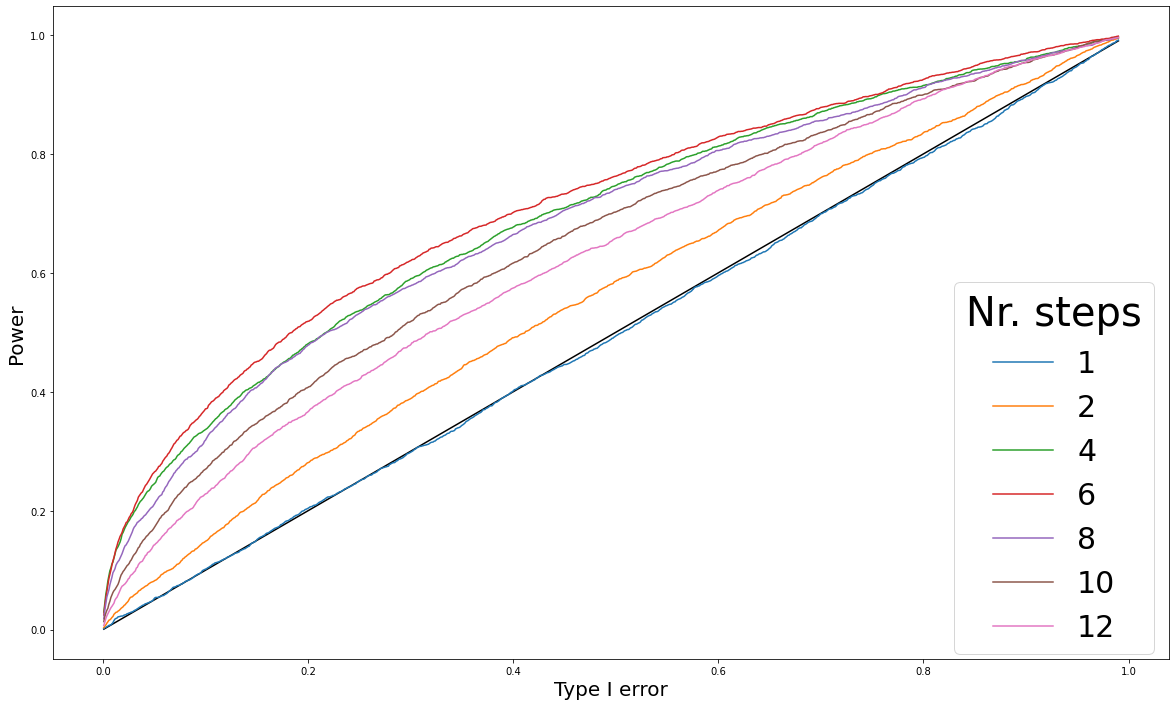

In [29]:
params_fixed = {'n':60,
                'm':60,
                'mean13':2,
                'mean23':2,
                'normalize':0,
                'w':0.01
                #'tmax':4
                }


plotVaryingBGDEG(df = data['PROP'].copy(), param_vary_name = "tmax", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. steps')


params_kernel['PROP'] = [ 'normalize', 'w', 'M', 'tmax']
data_auc['PROP'] = findAUC(keys = keys, params = params_kernel['PROP'], stats = ['MMD_b', 'MMD_u'], df = data['PROP'] )


# HASH

In [11]:
data['HASH'] = readfoldertopanda("../data/SBMAttributeNormal/HASH")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
data['HASH'].columns

Index(['kernel', 'alpha', 'normalize', 'probs_1', 'probs_2', 'sizes_1',
       'sizes_2', 'nr_nodes_1', 'nr_nodes_2', 'mean11', 'mean12', 'mean13',
       'mean21', 'mean22', 'mean23', 'm3_diff', 'n', 'm', 'timestap', 'B', 'N',
       'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree',
       'nitr', 'with_labels', 'w', 'iterations', 'scale', 'basekernel',
       'sigma'],
      dtype='object')

In [7]:
np.unique(data['HASH']['basekernel'])

array(['WL_kernel'], dtype=object)

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


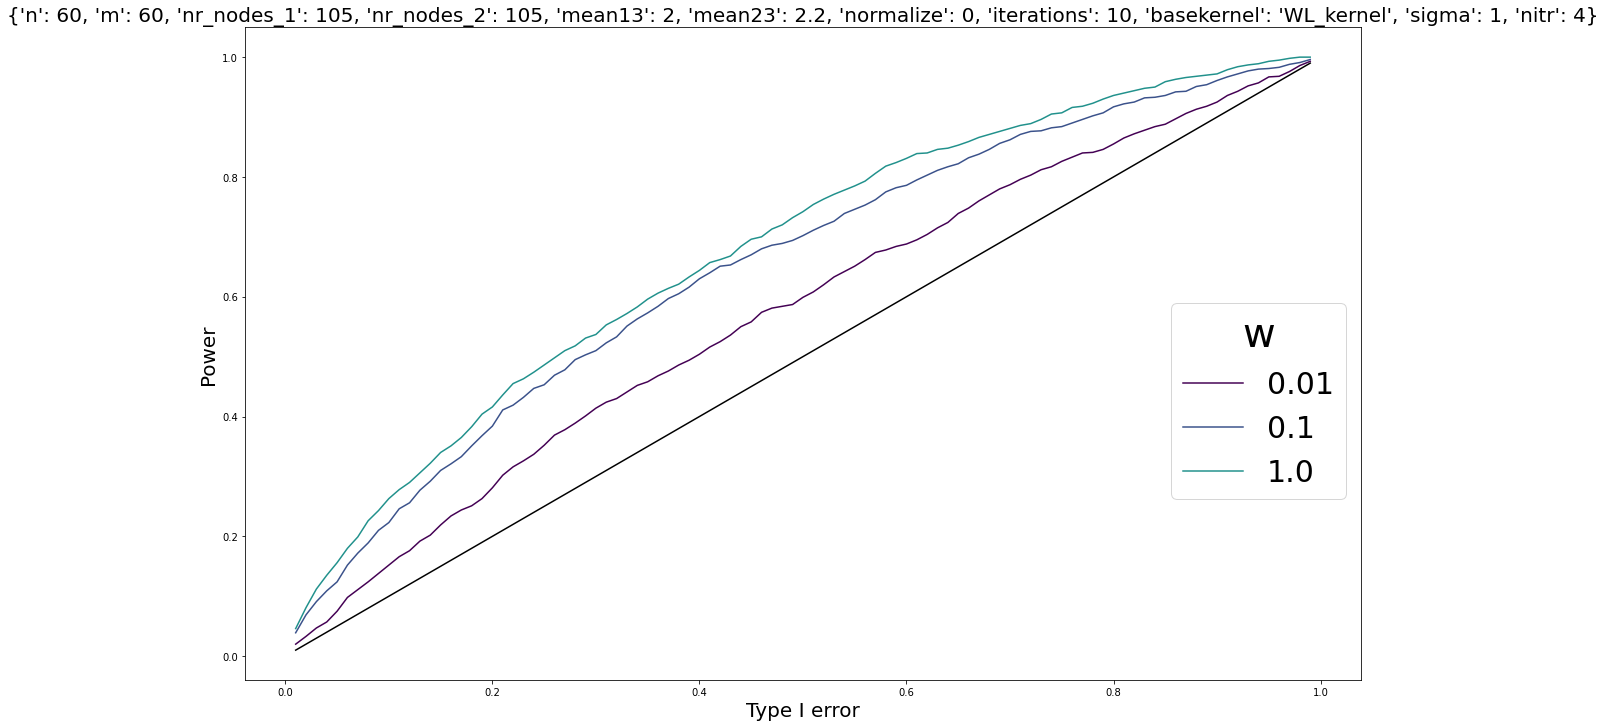

In [13]:
params_fixed = {'n':60,
                'm':60,
                'nr_nodes_1':105,
                'nr_nodes_2':105,
                'mean13':2,
                'mean23':2.2,
                'normalize':0,
                #'w':0.01,
                #'nitr':4,
                'iterations':10,
                'basekernel':'WL_kernel',
                'sigma':1,
                'nitr':4
                }


plotVaryingBGDEG(df = data['HASH'].copy(), param_vary_name = "w", params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")

# RW

In [25]:
data['RW'] = readfoldertopanda("../data/SBMAttributeNormal/RW")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
data['RW'].columns

Index(['kernel', 'alpha', 'normalize', 'probs_1', 'probs_2', 'sizes_1',
       'sizes_2', 'mean11', 'mean12', 'mean13', 'mean21', 'mean22', 'mean23',
       'm3_diff', 'n', 'm', 'timestap', 'B', 'N', 'run_time', 'MMD_b',
       'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'with_labels', 'type',
       'discount', 'r', 'normalize_adj', 'row_normalize_adj', 'tmax'],
      dtype='object')

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


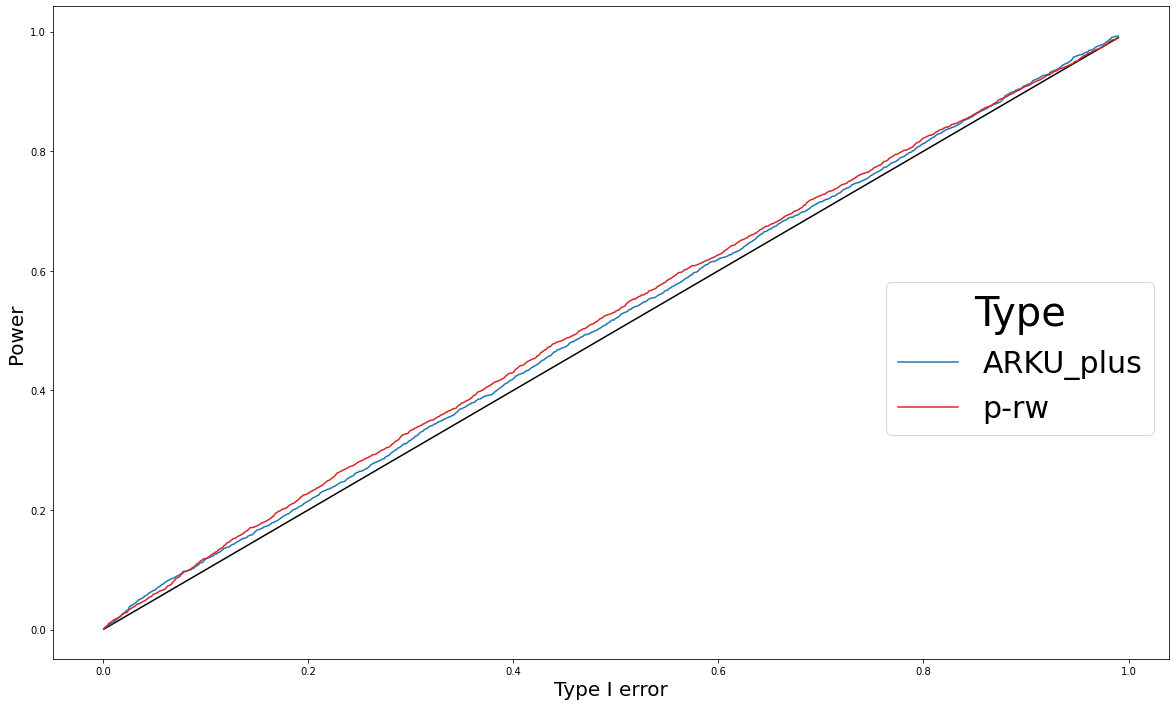

In [26]:
params_fixed = {'n':60,
                'm':60,
                'mean13':2,
                'mean23':2,
                'normalize':0,
                'discount':0.001,
                'r':3
                }


plotVaryingBGDEG(df = data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))], param_vary_name = "type", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Type')

params_kernel['RW'] = ['normalize', 'r', 'discount', 'type', 'tmax']
data_auc['RW'] = findAUC(keys = keys, params = params_kernel['RW'], stats = ['MMD_b', 'MMD_u'], df = data['RW'] )
